In [1]:
from common import setup_imports
from constants import *
import os

setup_imports()

from pipeline import Pipeline

%load_ext autoreload
%autoreload 2


utils.load_config:: Loaded config from /home/automatedtomato/github.com/automatedtomato/sar-yolo/config/006.yaml

utils.load_config:: Validated config: {'model': {'name': 'yolov3_sample_006', 'input_size': 416, 'n_classes': 0, 'grid_sizes': [13, 26, 52], 'anchors': [[[42.0, 27.0], [34.0, 58.0], [64.0, 35.0]], [[13.0, 25.0], [28.0, 20.0], [21.0, 38.0]], [[4.0, 6.0], [8.0, 14.0], [18.0, 13.0]]]}, 'data': {'bucket_name': 'sar-dataset', 'img_ext': '.png', 'annot_ext': '.txt', 'test': {'img_path': 'data/new_dataset3/test/images', 'annot_path': 'data/new_dataset3/test/labels'}, 'train': {'img_path': 'data/new_dataset3/train/images', 'annot_path': 'data/new_dataset3/train/labels'}, 'val': {'img_path': 'data/new_dataset3/val/images', 'annot_path': 'data/new_dataset3/val/labels'}, 'source': 'file', 'data_dir': '/home/automatedtomato/github.com/automatedtomato/sar-yolo/sar_dataset'}, 'dataloader': {'batch_size': 8, 'num_workers': 4, 'pin_memory': True}, 'training': {'log_interval': 100, 'accumu


data.dataset.data_loader:: Train Samples: 1225, Val Samples: 408, Test Samples: 408

pipeline.pipeline:: Data transforms are applied to the dataset. Total 1225 images are used for training.

pipeline.pipeline:: Using device: cuda

models.train_val.train:: 
Training model...
  Number of epochs: 1
  Device: cuda
  Patience: 10
  Save path: 006_best_model.pt

  Epoch: 1/1 - Batch: 0/154 - Loss: 64514.9414
      (Coord: 1054.8167, Obj: 514.5069, NoObj: 62945.6172, Class: 0.0000)
  Epoch: 1/1 - Batch: 100/154 - Loss: 4654.2778
      (Coord: 580.7950, Obj: 3502.2175, NoObj: 571.2652, Class: 0.0000)

Epoch 1/1 finished.
	Learning Rate: 0.010000
	Train Loss: 7265.0195
	Val Loss: 4017.0186
	Loss Details:
		Coord Loss: T=2166.4526, V=180.0241
		Obj Loss: T=3198.0558, V=3133.1018
		Class Loss: T=0.0000, V=0.0000

------------------------------------------------------------

Training finished. Best val loss = 4017.0186
Saving model to 006_best_model.pt


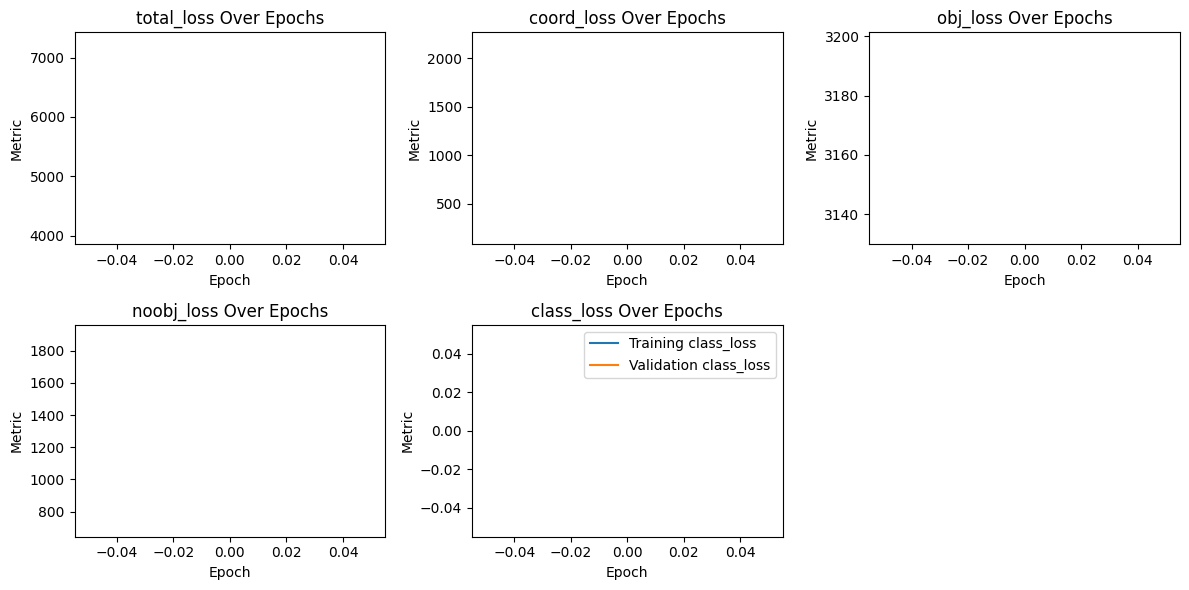


models.train_val.evaluation:: YOLOv3 evaluator initialized.

models.train_val.evaluation:: Evaluating model...
               model  n_epochs  learning_rate  weight_decay  batch_size  \
0  yolov3_sample_006         1           0.01        0.0005           8   

   accumulation_steps  total_loss  mAP  mAP_0.3  precision  recall  \
0                   1   4079.8857  0.0      0.0        0.0     0.0   

   recall_0.3  IoU  f1_score  n_preds  n_ground_truths  
0         0.0  0.0       0.0        0            41818  


In [2]:
pl = Pipeline(config_path=os.path.join(CONFIG_PATH, '006.yaml'))
metrics, model = pl.train_val_pipeline(load_ratio=0.2)

In [ ]:
metrics

{'model': 'yolov3_sample_006',
 'n_epochs': 1,
 'learning_rate': 0.001,
 'weight_decay': 0.001,
 'batch_size': 8,
 'accumulation_steps': 1,
 'total_loss': 4801.0922,
 'mAP': 0.0,
 'mAP_0.3': 0.0,
 'precision': 0.0,
 'recall': 0.0,
 'recall_0.3': 0.0,
 'IoU': 0.0,
 'f1_score': 0.0,
 'n_preds': 0,
 'n_ground_truths': 6129}

In [3]:
import pandas as pd

ex_df = pd.read_csv('../metrics/006_metrics.csv')
ex_df

,model,n_epochs,learning_rate,weight_decay,batch_size,accumulation_steps,total_loss,mAP,mAP_0.3,precision,recall,recall_0.3,IoU,f1_score,n_preds,n_ground_truths
0,yolov3_sample_006,3,0.001,0.001,8,1,3813.9125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1224


In [ ]:
metrics.